In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("/kaggle/input/movie-predict/data/data_unnoise.csv")

In [3]:
len(df)

5374

In [4]:
df

,budget,genres,homepage,popularity,production_companies,production_countries,runtime,spoken_languages,vote_average,vote_count,lang_english,year,holiday,revenue
0,30000000,3,1,21.946943,1,1,81.0,1,7.7,5415,1,1995,1,373554033
1,65000000,3,0,17.015539,3,1,104.0,2,6.9,2413,1,1995,1,262797249
2,16000000,3,0,3.859495,1,1,127.0,1,6.1,34,1,1995,1,81452156
3,60000000,4,0,17.924927,3,1,170.0,2,7.7,1886,1,1995,1,187436818
4,35000000,3,0,5.231580,3,1,106.0,1,5.5,174,1,1995,1,64350171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,12000000,3,0,1.323587,1,1,185.0,2,6.9,25,0,2007,1,19000000
5370,750000,2,0,0.201582,2,1,0.0,1,6.0,4,0,2014,1,3
5371,800000,2,0,0.903061,0,0,100.0,1,5.8,6,1,2006,1,1328612
5372,2000000,2,0,0.121844,1,1,107.0,1,4.0,3,1,2010,0,1268793


In [5]:
df.columns

Index(['budget', 'genres', 'homepage', 'popularity', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'vote_average',
       'vote_count', 'lang_english', 'year', 'holiday', 'revenue'],
      dtype='object')

In [6]:
X, y = df.drop('revenue', axis=1), df['revenue']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [8]:
print(f"Length of train set: {len(X_train)}")

print(f"Length of test set: {len(X_test)}")

Length of train set: 4299
Length of test set: 1075


In [9]:
lr_model = LinearRegression()

In [10]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
predict_test_lr = lr_model.predict(X_test)

In [12]:
test_score_lr = lr_model.score(X_test, y_test)
print(f'Test score of linear regression: {test_score_lr}')

Test score of linear regression: 0.7097508083164337


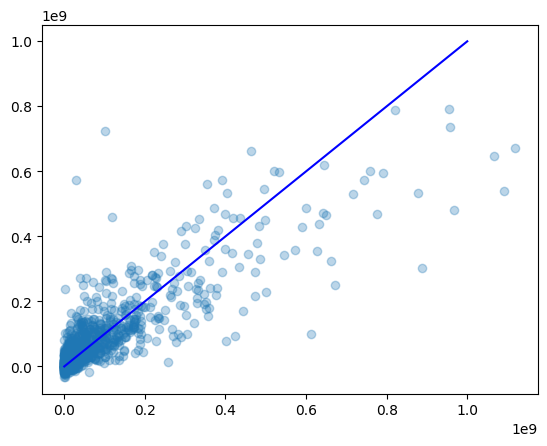

In [13]:
plt.scatter(y_test, predict_test_lr, alpha=0.3)
plt.plot([1, 1000000000], [1, 1000000000], color='blue')

In [14]:
print(len(y_test))

print(len(predict_test_lr))

1075
1075


In [15]:
def getMAE(real, predict):

    sum = 0

    length = len(real)

    for i in range(length):
        sum += np.absolute(real[i] - predict[i])
        
    return sum / length

In [16]:
x = np.arange(0, 100, 1, dtype=None)

In [17]:
X_train = X_train[:100]
X_test = X_test[:100]
y_train = y_train[:100]
y_test = y_test[:100]
predict_test_lr = predict_test_lr[:100]
predict_train_lr = predict_test_lr[:100]

In [18]:
data_pred = {
    'index': x, 
    'revenue_pred': predict_test_lr
}
df_pred = pd.DataFrame(data_pred)
df_pred.head()

,index,revenue_pred
0,0,2.791270e+07
1,1,1.985864e+07
2,2,-1.964284e+07
3,3,1.749021e+07
4,4,-6.230438e+05


In [19]:
y_real = y_test.values
data_real = {
    'index': x,
    'revenue_test': y_real
}
df_real = pd.DataFrame(data_real)
df_real.head()

,index,revenue_test
0,0,18599102
1,1,6000000
2,2,1000000
3,3,29174648
4,4,10367161


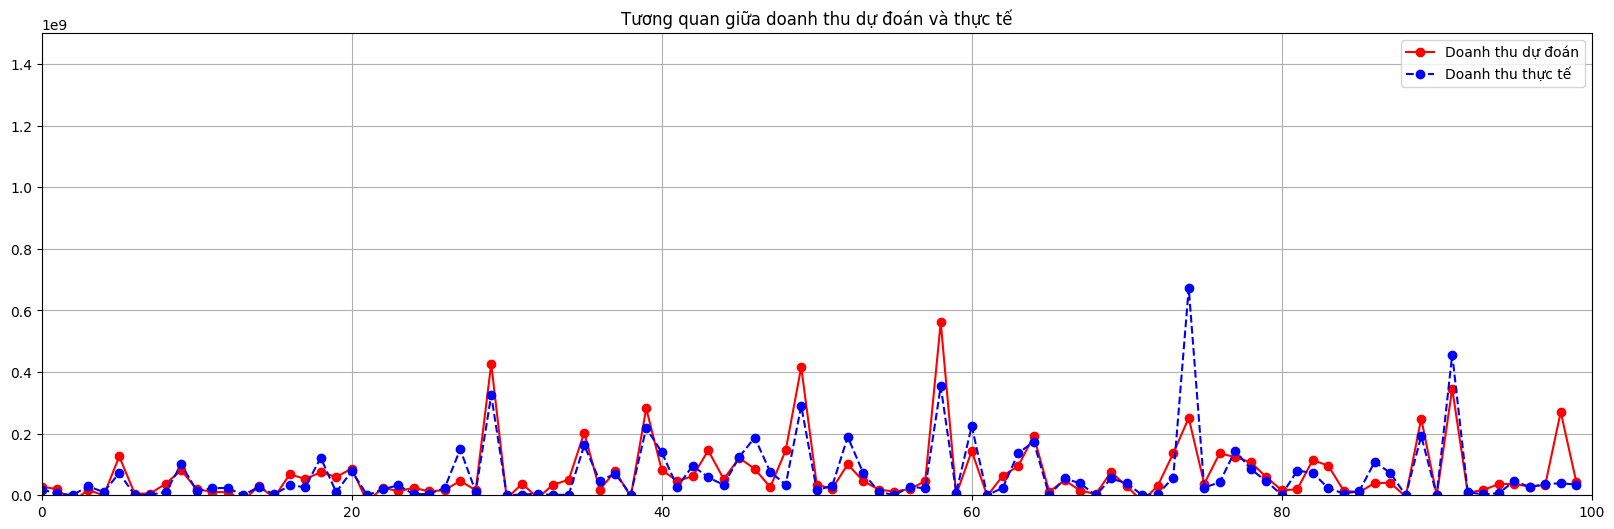

In [20]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

plt.title("Tương quan giữa doanh thu dự đoán và thực tế")

plt.xlim([0, 100])
plt.ylim([0, 1500000000])
plt.plot(df_pred['index'], df_pred['revenue_pred'], color='red', label="Doanh thu dự đoán", marker='o')
plt.plot(df_real['index'], df_real['revenue_test'], color='blue', label="Doanh thu thực tế", linestyle='dashed', marker='o')
plt.legend();

plt.grid(True);
plt.show();